In [1]:
#!pip install yellowbrick
# pip install bs4
from bs4 import BeautifulSoup
import pandas as pd
# pip install bs4
from bs4 import BeautifulSoup
import pandas as pd
import requests
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#!pip install yellowbrick
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
from datetime import datetime


#!pip install sklearn

In [2]:
# Function to read a csv file is read_csv
df = pd.read_csv("sales_record.csv")
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,12/20/2013,957081544,1/11/2014,552,255.28,159.42,140914.56,87999.84,52914.72
1,Central America and the Caribbean,Panama,Snacks,Offline,C,7/5/2010,301644504,7/26/2010,2167,152.58,97.44,330640.86,211152.48,119488.38
2,Europe,Czech Republic,Beverages,Offline,C,9/12/2011,478051030,9/29/2011,4778,47.45,31.79,226716.10,151892.62,74823.48
3,Asia,North Korea,Cereal,Offline,L,5/13/2010,892599952,6/15/2010,9016,205.70,117.11,1854591.20,1055863.76,798727.44
4,Asia,Sri Lanka,Snacks,Offline,C,7/20/2015,571902596,7/27/2015,7542,152.58,97.44,1150758.36,734892.48,415865.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Australia and Oceania,New Zealand,Household,Offline,C,4/3/2015,217984473,4/20/2015,5305,668.27,502.54,3545172.35,2665974.70,879197.65
4996,Middle East and North Africa,Azerbaijan,Clothes,Offline,L,8/17/2014,169748055,10/2/2014,1077,109.28,35.84,117694.56,38599.68,79094.88
4997,Asia,Myanmar,Baby Food,Offline,H,11/23/2016,226939189,12/10/2016,5204,255.28,159.42,1328477.12,829621.68,498855.44
4998,Europe,Finland,Clothes,Online,L,4/22/2014,906794202,5/11/2014,9410,109.28,35.84,1028324.80,337254.40,691070.40


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          5000 non-null   object 
 1   Country         5000 non-null   object 
 2   Item Type       5000 non-null   object 
 3   Sales Channel   5000 non-null   object 
 4   Order Priority  5000 non-null   object 
 5   Order Date      5000 non-null   object 
 6   Order ID        5000 non-null   int64  
 7   Ship Date       5000 non-null   object 
 8   Units Sold      5000 non-null   int64  
 9   Unit Price      5000 non-null   float64
 10  Unit Cost       5000 non-null   float64
 11  Total Revenue   5000 non-null   float64
 12  Total Cost      5000 non-null   float64
 13  Total Profit    5000 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 547.0+ KB


In [4]:
datetime_object = datetime.strptime('Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
df['Order Date'] =  df['Order Date'].astype('datetime64[ns]')
df['Ship Date'] =  df['Ship Date'].astype('datetime64[ns]')

In [5]:
df['Shipping Time'] = df['Ship Date'] - df['Order Date']
df['Order Year'] = df['Order Date'].apply(lambda x: x.date().year)
df['Order Month'] = df['Order Date'].apply(lambda x: x.date().month)
df['Order Day'] = df['Order Date'].apply(lambda x: x.date().day)

df['Ship Year'] = df['Ship Date'].apply(lambda x: x.date().year)
df['Ship Month'] = df['Ship Date'].apply(lambda x: x.date().month)
df['Ship Day'] = df['Ship Date'].apply(lambda x: x.date().day)


df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,...,Total Revenue,Total Cost,Total Profit,Shipping Time,Order Year,Order Month,Order Day,Ship Year,Ship Month,Ship Day
0,Central America and the Caribbean,Antigua and Barbuda,Baby Food,Online,M,2013-12-20,957081544,2014-01-11,552,255.28,...,140914.56,87999.84,52914.72,22 days,2013,12,20,2014,1,11
1,Central America and the Caribbean,Panama,Snacks,Offline,C,2010-07-05,301644504,2010-07-26,2167,152.58,...,330640.86,211152.48,119488.38,21 days,2010,7,5,2010,7,26
2,Europe,Czech Republic,Beverages,Offline,C,2011-09-12,478051030,2011-09-29,4778,47.45,...,226716.10,151892.62,74823.48,17 days,2011,9,12,2011,9,29
3,Asia,North Korea,Cereal,Offline,L,2010-05-13,892599952,2010-06-15,9016,205.70,...,1854591.20,1055863.76,798727.44,33 days,2010,5,13,2010,6,15
4,Asia,Sri Lanka,Snacks,Offline,C,2015-07-20,571902596,2015-07-27,7542,152.58,...,1150758.36,734892.48,415865.88,7 days,2015,7,20,2015,7,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,Australia and Oceania,New Zealand,Household,Offline,C,2015-04-03,217984473,2015-04-20,5305,668.27,...,3545172.35,2665974.70,879197.65,17 days,2015,4,3,2015,4,20
4996,Middle East and North Africa,Azerbaijan,Clothes,Offline,L,2014-08-17,169748055,2014-10-02,1077,109.28,...,117694.56,38599.68,79094.88,46 days,2014,8,17,2014,10,2
4997,Asia,Myanmar,Baby Food,Offline,H,2016-11-23,226939189,2016-12-10,5204,255.28,...,1328477.12,829621.68,498855.44,17 days,2016,11,23,2016,12,10
4998,Europe,Finland,Clothes,Online,L,2014-04-22,906794202,2014-05-11,9410,109.28,...,1028324.80,337254.40,691070.40,19 days,2014,4,22,2014,5,11


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   Region          5000 non-null   object         
 1   Country         5000 non-null   object         
 2   Item Type       5000 non-null   object         
 3   Sales Channel   5000 non-null   object         
 4   Order Priority  5000 non-null   object         
 5   Order Date      5000 non-null   datetime64[ns] 
 6   Order ID        5000 non-null   int64          
 7   Ship Date       5000 non-null   datetime64[ns] 
 8   Units Sold      5000 non-null   int64          
 9   Unit Price      5000 non-null   float64        
 10  Unit Cost       5000 non-null   float64        
 11  Total Revenue   5000 non-null   float64        
 12  Total Cost      5000 non-null   float64        
 13  Total Profit    5000 non-null   float64        
 14  Shipping Time   5000 non-null   timedelt

In [7]:
df['Order Year'].unique()

array([2013, 2010, 2011, 2015, 2016, 2014, 2017, 2012], dtype=int64)

In [8]:
df['Ship Year'].unique()

array([2014, 2010, 2011, 2015, 2013, 2016, 2017, 2012], dtype=int64)

In [9]:
df['Shipping Time'].describe()

count                          5000
mean        25 days 01:05:57.120000
std      14 days 14:10:28.642900186
min                 0 days 00:00:00
25%                12 days 00:00:00
50%                25 days 00:00:00
75%                38 days 00:00:00
max                50 days 00:00:00
Name: Shipping Time, dtype: object

In [10]:
df['Region'].unique()

array(['Central America and the Caribbean', 'Europe', 'Asia',
       'Middle East and North Africa', 'Australia and Oceania',
       'Sub-Saharan Africa', 'North America'], dtype=object)

In [11]:
df['Country'].nunique()

185

In [12]:
df['Item Type'].nunique()

12

In [13]:
df['Order Priority'].nunique()

4

In [14]:
# Create subset
df_subset = df[[ 'Region', 'Unit Price','Total Profit','Item Type']]
df_subset.head()

,Region,Unit Price,Total Profit,Item Type
0,Central America and the Caribbean,255.28,52914.72,Baby Food
1,Central America and the Caribbean,152.58,119488.38,Snacks
2,Europe,47.45,74823.48,Beverages
3,Asia,205.70,798727.44,Cereal
4,Asia,152.58,415865.88,Snacks


In [15]:
df1 = df_subset.groupby('Region').describe()['Total Profit']
df1

,count,mean,std,min,25%,50%,75%,max
Region,,,,,,,,
Asia,719.0,386978.667163,384988.998809,159.06,75413.6200,266657.040,568378.3000,1699926.99
Australia and Oceania,416.0,420515.800337,393038.644587,62.64,119438.2750,320785.920,594990.5250,1696275.72
Central America and the Caribbean,534.0,383168.501348,366185.113560,146.88,86869.3725,280613.545,545824.1675,1664283.64
Europe,1330.0,377200.036331,368983.280427,130.14,84822.9375,273594.610,547658.1750,1700448.60
Middle East and North Africa,610.0,379311.968082,375112.739526,1062.81,80954.3250,243985.520,564777.4150,1710011.45
North America,106.0,389060.358208,424858.296808,16.87,72183.2825,226699.070,561497.3450,1703404.39
Sub-Saharan Africa,1285.0,413340.286319,398686.037723,146.88,85597.5600,313726.890,609015.1100,1726007.49


In [16]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit',
       'Shipping Time', 'Order Year', 'Order Month', 'Order Day', 'Ship Year',
       'Ship Month', 'Ship Day'],
      dtype='object')

In [17]:
#temp = df.groupby('Region')['Sales Channel'].value_counts().unstack(level=1)
#temp.plot.bar(stacked=True, title='The number of Students', figsize = (15,6))
#temp

Sales Channel,Offline,Online
Region,,
Asia,1721628,1898408
Australia and Oceania,1099518,1012268
Central America and the Caribbean,1315677,1383099
Europe,3326161,3256161
Middle East and North Africa,1525111,1488320
North America,259766,224994
Sub-Saharan Africa,3321730,3320650


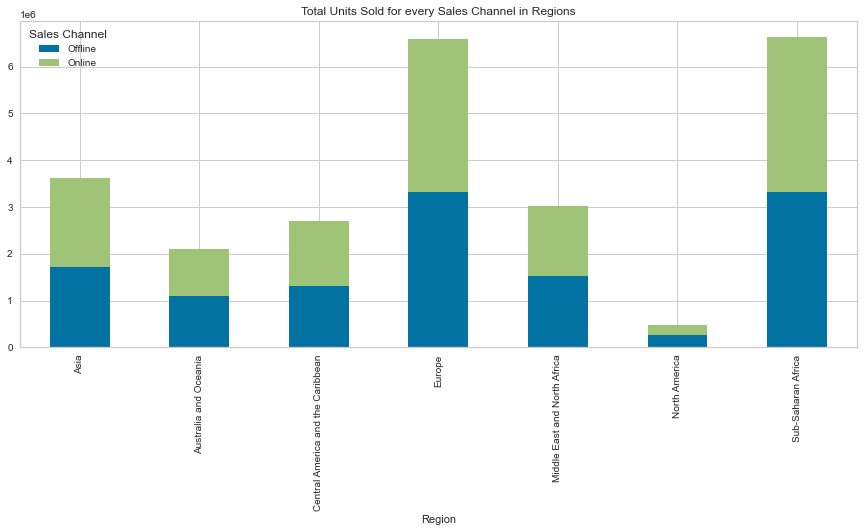

In [18]:
temp = df.pivot_table(index = 'Region', columns = 'Sales Channel', values = 'Units Sold', aggfunc = 'sum')
temp.plot.bar(stacked=True, title='Total Units Sold for every Sales Channel in Regions', figsize = (15,6))
temp

Order Priority,C,H,L,M
Region,,,,
Asia,941578,833517,934394,910547
Australia and Oceania,476320,527796,548079,559591
Central America and the Caribbean,748092,742929,605910,601845
Europe,1515439,1658736,1613548,1794599
Middle East and North Africa,644784,818701,743947,805999
North America,118264,160883,82307,123306
Sub-Saharan Africa,1481555,1661515,1475634,2023676


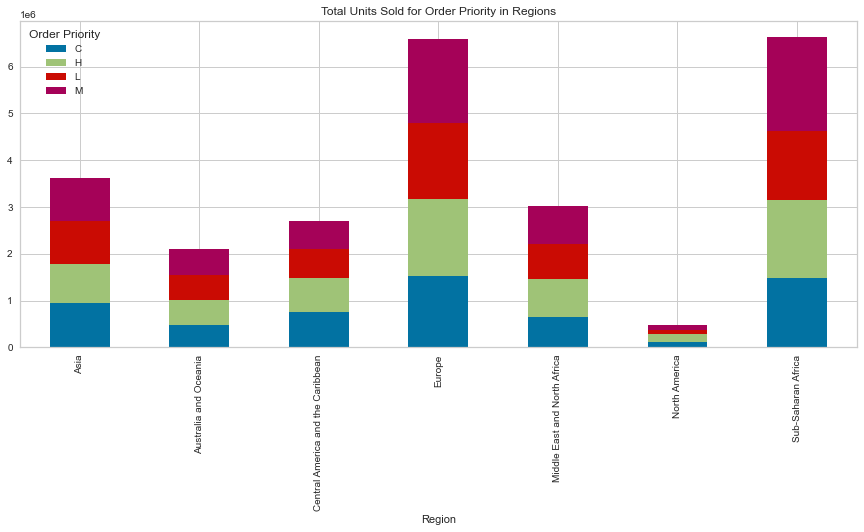

In [19]:
temp2 = df.pivot_table(index = 'Region', columns = 'Order Priority', values = 'Units Sold', aggfunc = 'sum')
temp2.plot.bar(stacked=True, title='Total Units Sold for Order Priority in Regions', figsize = (15,6))
temp2

,Region,Total Profit
0,Asia,2.782377e+08
1,Australia and Oceania,1.749346e+08
2,Central America and the Caribbean,2.046120e+08
3,Europe,5.016760e+08
4,Middle East and North Africa,2.313803e+08
5,North America,4.124040e+07
6,Sub-Saharan Africa,5.311423e+08


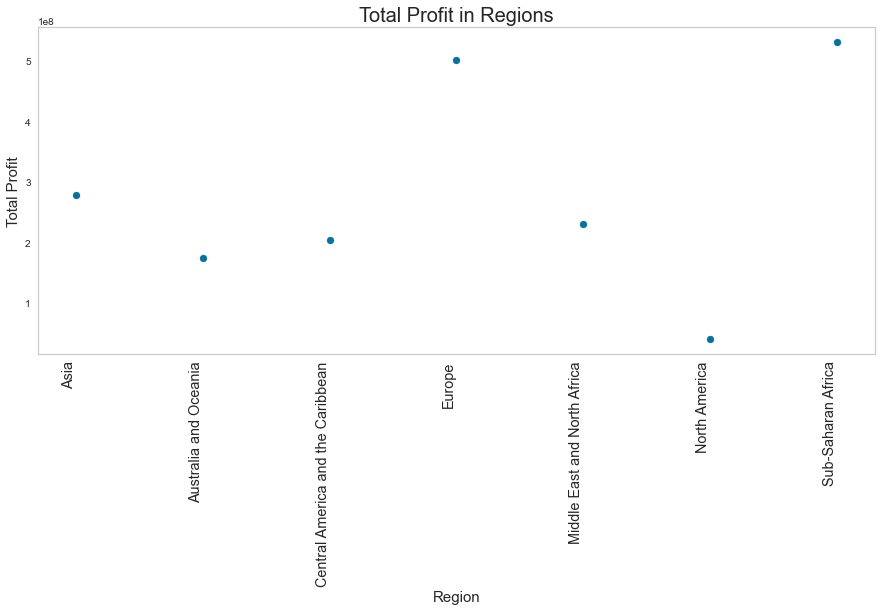

In [20]:
temp = pd.DataFrame(df.groupby('Region')['Total Profit'].sum())
temp.reset_index(inplace = True)
fig = plt.figure(figsize=(15,6))
plt.scatter(data = temp, x = 'Region', y = 'Total Profit')
plt.title('Total Profit in Regions',fontsize = 20)
plt.ylabel('Total Profit',fontsize = 15)
plt.xlabel('Region',fontsize = 15)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.grid(False)
temp

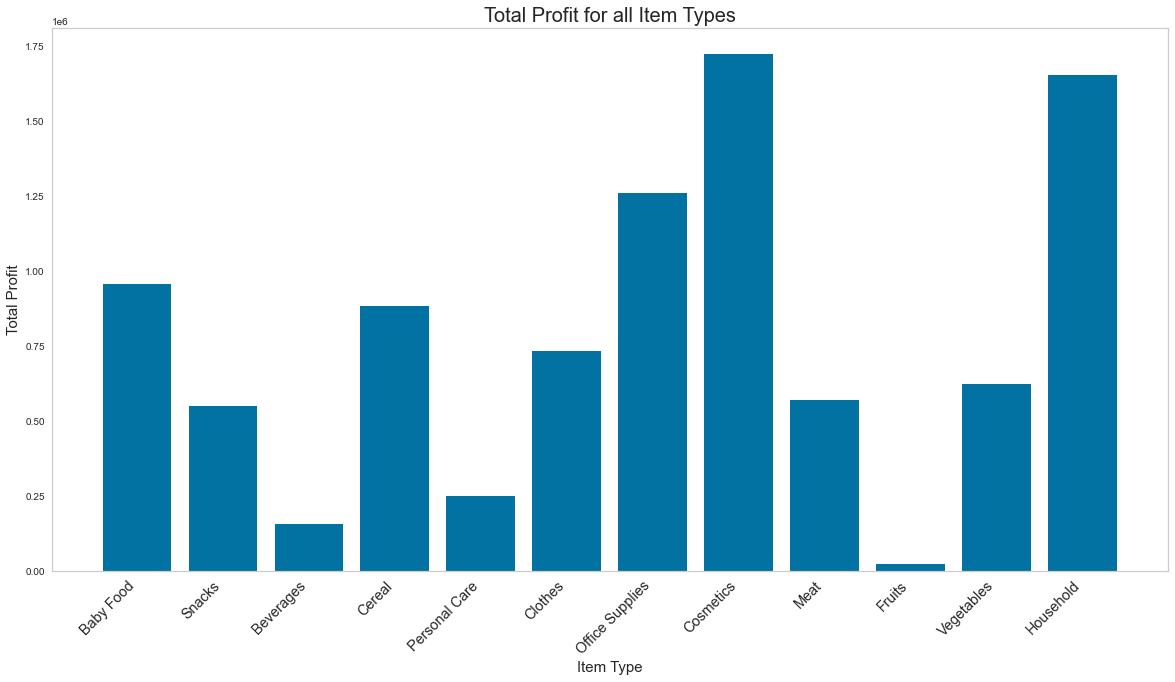

In [21]:
#  bar chart
fig = plt.figure(figsize=(20,10))
plt.bar( df['Item Type'],df['Total Profit'])
plt.title('Total Profit for all Item Types',fontsize = 20)
plt.ylabel('Total Profit',fontsize = 15)
plt.xlabel('Item Type',fontsize = 15)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.grid(False)

plt.show()

,Order Year,Total Profit
0,2010,2.415637e+08
1,2011,2.583138e+08
2,2012,2.756606e+08
3,2013,2.649971e+08
4,2014,2.564095e+08
5,2015,2.727459e+08
6,2016,2.539424e+08
7,2017,1.395902e+08


<Figure size 1080x432 with 0 Axes>

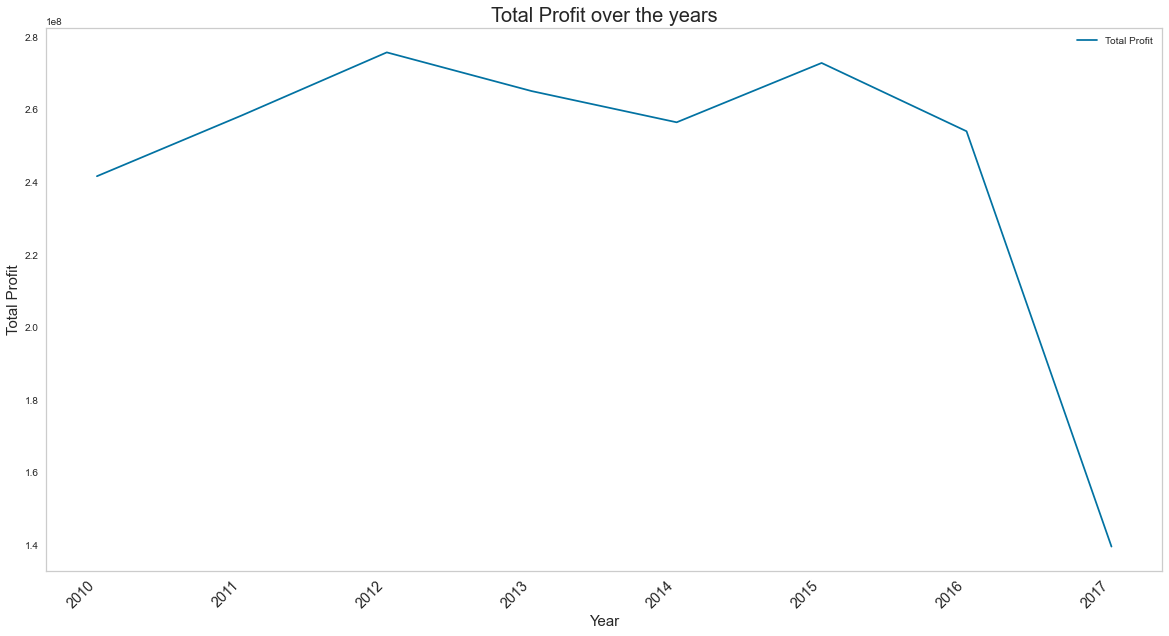

In [22]:
temp = pd.DataFrame(df.groupby('Order Year')['Total Profit'].sum())
temp.reset_index(inplace = True)
fig = plt.figure(figsize=(15,6))
temp.plot( x = 'Order Year', y = 'Total Profit', figsize = (20,10))
plt.title('Total Profit over the years',fontsize = 20)
plt.ylabel('Total Profit',fontsize = 15)
plt.xlabel('Year',fontsize = 15)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.grid(False)
temp

,Order Month,Total Profit
0,1,1.926780e+08
1,2,1.555835e+08
2,3,1.708039e+08
3,4,1.639693e+08
4,5,1.794120e+08
5,6,1.701315e+08
6,7,1.749073e+08
7,8,1.573253e+08
8,9,1.499884e+08
9,10,1.492752e+08


<Figure size 1080x432 with 0 Axes>

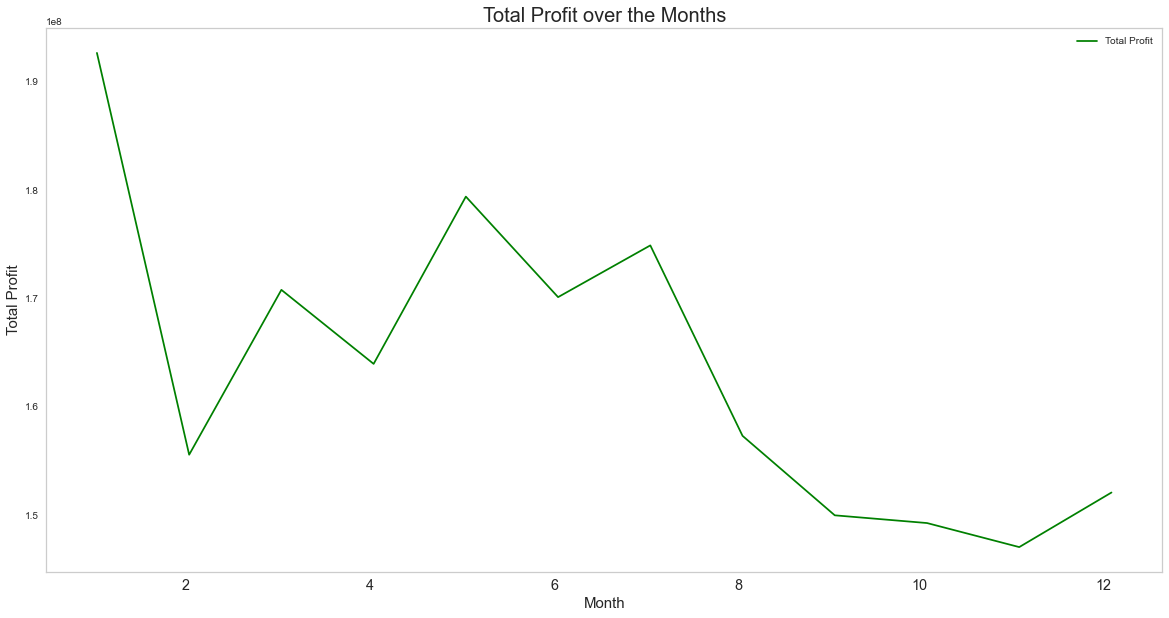

In [23]:
temp = pd.DataFrame(df.groupby('Order Month')['Total Profit'].sum())
temp.reset_index(inplace = True)
fig = plt.figure(figsize=(15,6))
temp.plot( x = 'Order Month', y = 'Total Profit', figsize = (20,10), color = 'green')
plt.title('Total Profit over the Months',fontsize = 20)
plt.ylabel('Total Profit',fontsize = 15)
plt.xlabel('Month',fontsize = 15)
plt.xticks(
    rotation=0, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.grid(False)
temp

,Order Day,Total Profit
0,1,80298595.77
1,2,56482688.70
2,3,67721109.06
3,4,61008899.62
4,5,69671970.66
5,6,71251545.90
6,7,56917452.48
7,8,58552087.67
8,9,67458368.45
9,10,62675243.73


<Figure size 1080x432 with 0 Axes>

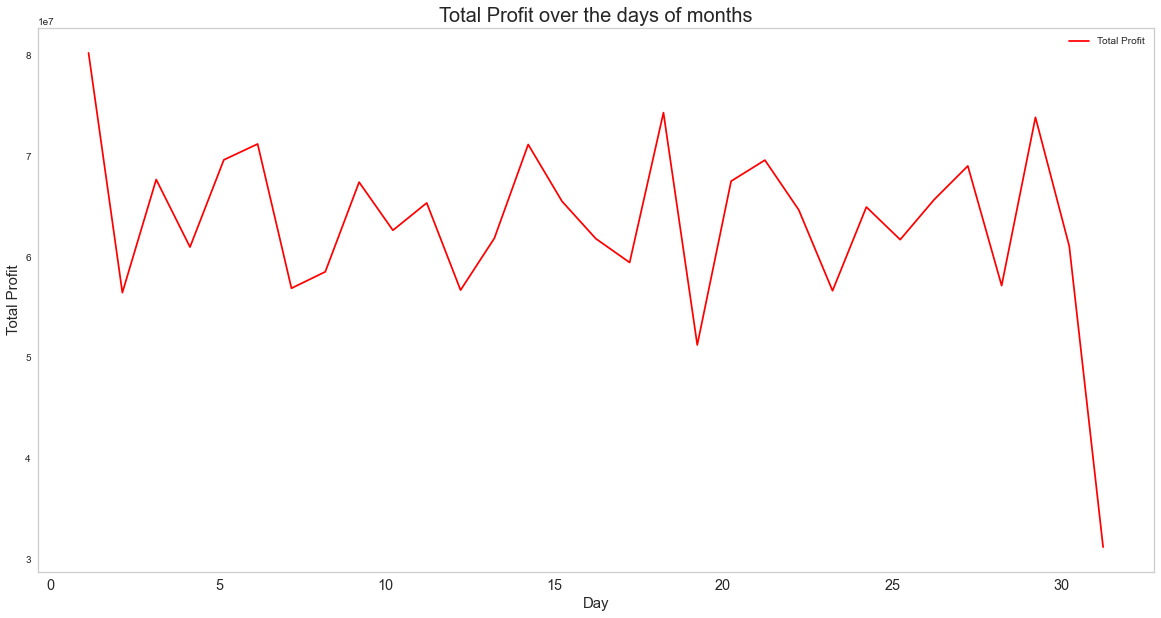

In [24]:
temp = pd.DataFrame(df.groupby('Order Day')['Total Profit'].sum())
temp.reset_index(inplace = True)
fig = plt.figure(figsize=(15,6))
temp.plot( x = 'Order Day', y = 'Total Profit', figsize = (20,10), color = 'red')
plt.title('Total Profit over the days of months',fontsize = 20)
plt.ylabel('Total Profit',fontsize = 15)
plt.xlabel('Day',fontsize = 15)
plt.xticks(
    rotation=0, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.grid(False)
temp

Region,Asia,Australia and Oceania,Central America and the Caribbean,Europe,Middle East and North Africa,North America,Sub-Saharan Africa
Order Year,,,,,,,
2010,467129,277143,333103,843713,352287,91254,765508
2011,384165,283832,426646,906147,379404,63574,908626
2012,515244,364343,278743,1055249,424673,46471,800322
2013,474400,257966,419457,770550,454686,86803,894722
2014,491147,237357,302052,910525,329238,25038,919542
2015,520887,290790,411644,758689,416875,78489,1029174
2016,508427,255186,326065,823955,485760,42361,839064
2017,258637,145169,201066,513494,170508,50770,485422


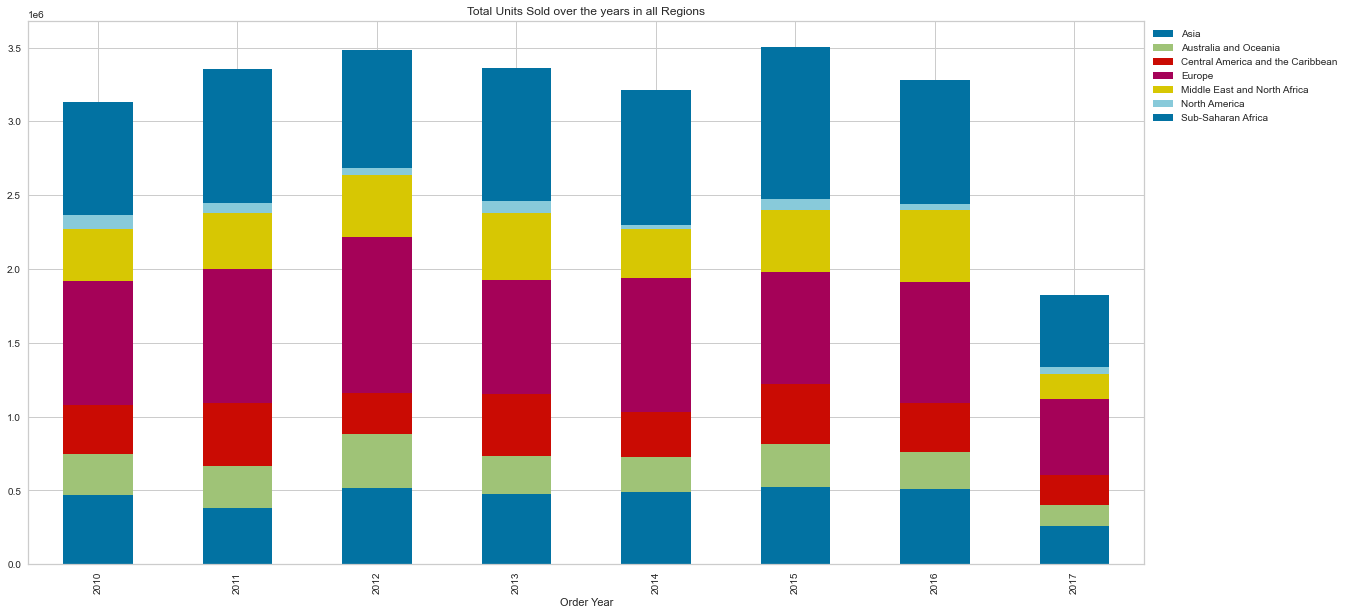

In [25]:
temp2 = df.pivot_table(index = 'Order Year', columns = 'Region', values = 'Units Sold', aggfunc = 'sum')
temp2.plot.bar(stacked=True, title='Total Units Sold over the years in all Regions', figsize = (20,10))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
temp2

Region,Asia,Australia and Oceania,Central America and the Caribbean,Europe,Middle East and North Africa,North America,Sub-Saharan Africa
Order Month,,,,,,,
1,319997,217948,260637,637190,273744,37660,646532
2,284873,158796,241849,531558,282348,10233,555971
3,323643,220059,182226,693714,239919,32589,496534
4,366251,162049,215177,487292,207218,46112,591489
5,323021,189335,261894,561755,222847,44378,684675
6,296796,111187,326362,630928,261030,58346,556296
7,293900,110985,213752,603090,259561,76927,642821
8,321828,162089,158063,423109,332026,37891,559332
9,320734,202463,238859,491336,259706,27113,447374


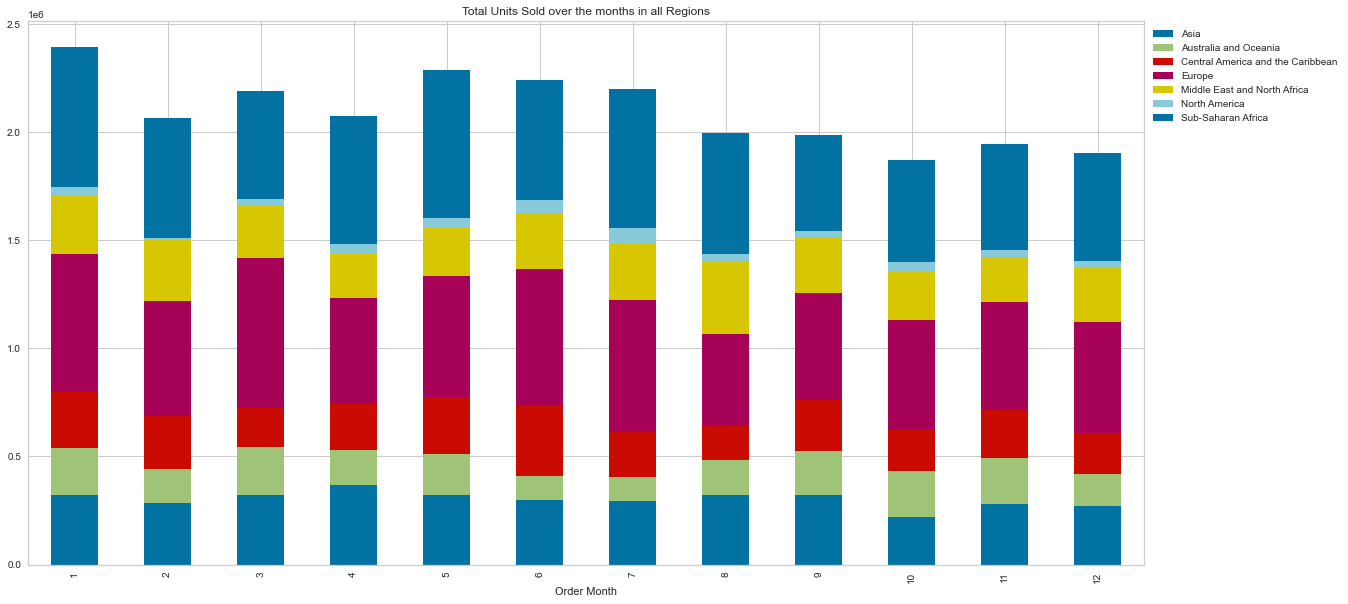

In [26]:
temp2 = df.pivot_table(index = 'Order Month', columns = 'Region', values = 'Units Sold', aggfunc = 'sum')
temp2.plot.bar(stacked=True, title='Total Units Sold over the months in all Regions', figsize = (20,10))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
temp2

Region,Asia,Australia and Oceania,Central America and the Caribbean,Europe,Middle East and North Africa,North America,Sub-Saharan Africa
Order Day,,,,,,,
1,110112.0,105655.0,105508.0,205280.0,115960.0,9551.0,218625.0
2,98487.0,70689.0,65668.0,198848.0,87547.0,10874.0,241550.0
3,185438.0,57965.0,64170.0,203483.0,87433.0,17305.0,257975.0
4,141552.0,45552.0,135723.0,161363.0,53762.0,35451.0,265901.0
5,123073.0,43861.0,115990.0,221178.0,147100.0,NaN,231421.0
6,142250.0,81509.0,77072.0,233300.0,107820.0,16123.0,241159.0
7,108391.0,68149.0,102499.0,206687.0,64962.0,5592.0,178839.0
8,99109.0,54733.0,124690.0,220392.0,108023.0,9940.0,185268.0
9,108019.0,79584.0,79943.0,291719.0,113438.0,20119.0,226386.0


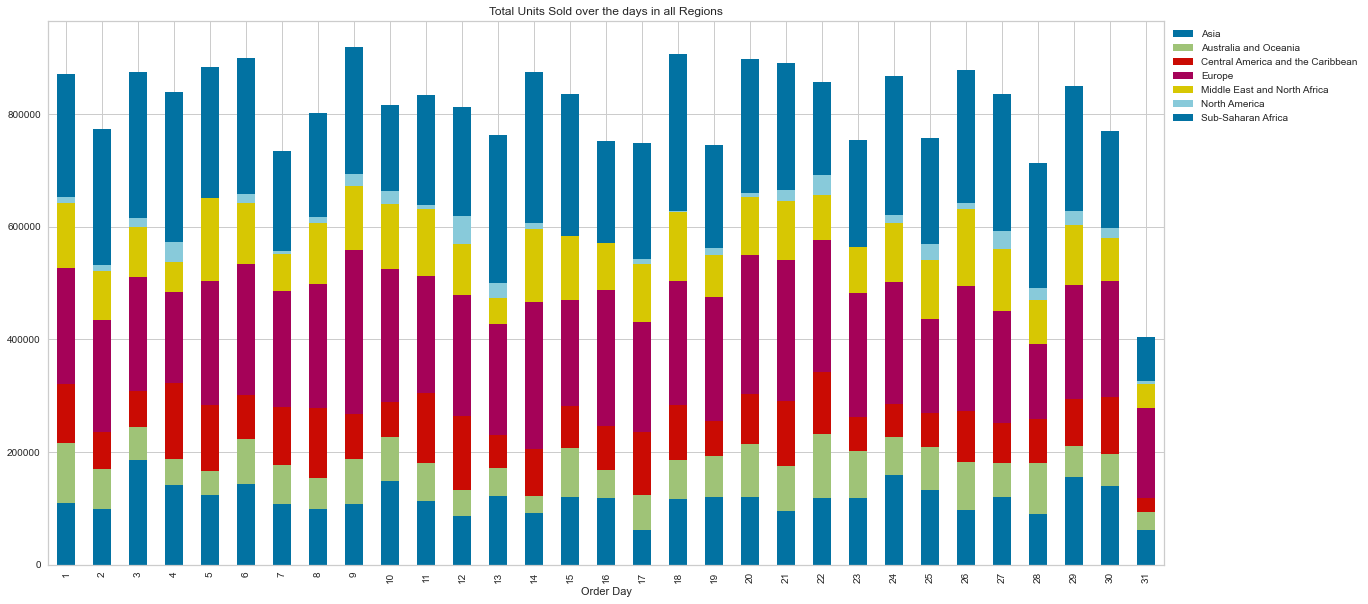

In [27]:
temp2 = df.pivot_table(index = 'Order Day', columns = 'Region', values = 'Units Sold', aggfunc = 'sum')
temp2.plot.bar(stacked=True, title='Total Units Sold over the days in all Regions', figsize = (20,10))
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)
temp2

In [28]:
df['Shipping Days'] = df['Shipping Time'].apply(lambda x: x.days)

,Region,Shipping Days
0,Asia,25.144645
1,Australia and Oceania,24.257212
2,Central America and the Caribbean,24.913858
3,Europe,24.775940
4,Middle East and North Africa,25.213115
5,North America,25.575472
6,Sub-Saharan Africa,25.456809


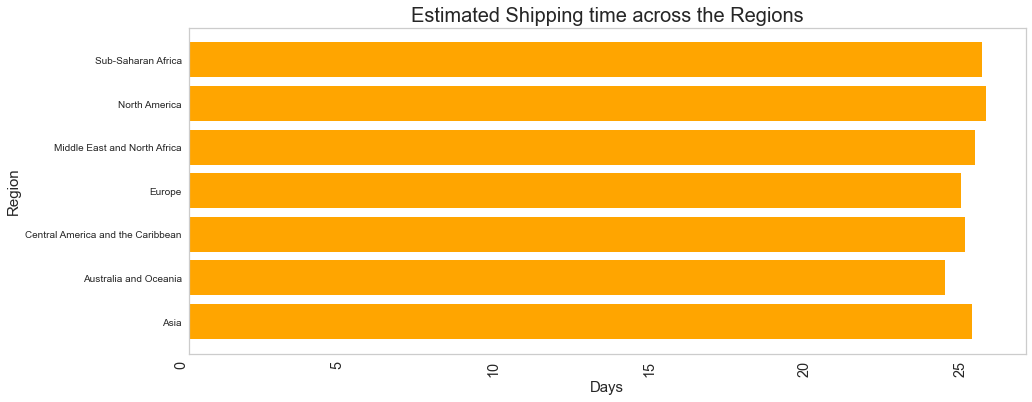

In [29]:
temp = pd.DataFrame(df.groupby('Region')['Shipping Days'].mean())
temp.reset_index(inplace = True)
fig = plt.figure(figsize=(15,6))
plt.barh(temp['Region'],temp['Shipping Days'], color = 'orange')
#plt.bar(data = temp, x = 'Region', y = 'Shipping Days', figsize = (20,6))
plt.title('Estimated Shipping time across the Regions',fontsize = 20)
plt.xlabel('Days',fontsize = 15)
plt.ylabel('Region',fontsize = 15)
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
)
plt.grid(False)
temp

In [30]:
# check if any columns contains NaN
print("The column Country contains NaN -%r"% df['Country'].isnull().values.any())
print("The column OrderID contains NaN -%s"% df['Order ID'].isnull().values.any())
print("The column Units_Sold contains NaN -%s"% df['Units Sold'].isnull().values.any())
print("The column Unit_Cost contains NaN -%s"% df['Unit Cost'].isnull().values.any())
print("The column Unit_Price contains NaN -%s"% df['Unit Price'].isnull().values.any())

The column Country contains NaN -False
The column OrderID contains NaN -False
The column Units_Sold contains NaN -False
The column Unit_Cost contains NaN -False
The column Unit_Price contains NaN -False


In [41]:
# Function to remove unimportant features for project

df.pop('Region')

df_items = pd.get_dummies(df, columns=['Item Type'])
df_country = pd.get_dummies(df, columns=['Country'])
df.pop('Item Type')
df.pop('Country')
df.pop('Order ID')
df.pop('Order Priority')
df.pop('Ship Date')
df.pop('Sales Channel')
df.pop('Order Date')
df.pop('Order Year')
df.pop('Order Month')
df.pop('Order Day')
df.pop('Ship Year')
df.pop('Ship Month')
df.pop('Ship Day')
df.pop('Shipping Time')
df.pop('Shipping Days')


df

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,552,255.28,159.42,140914.56,87999.84,52914.72
1,2167,152.58,97.44,330640.86,211152.48,119488.38
2,4778,47.45,31.79,226716.10,151892.62,74823.48
3,9016,205.70,117.11,1854591.20,1055863.76,798727.44
4,7542,152.58,97.44,1150758.36,734892.48,415865.88
...,...,...,...,...,...,...
4995,5305,668.27,502.54,3545172.35,2665974.70,879197.65
4996,1077,109.28,35.84,117694.56,38599.68,79094.88
4997,5204,255.28,159.42,1328477.12,829621.68,498855.44
4998,9410,109.28,35.84,1028324.80,337254.40,691070.40


In [42]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Units Sold,1.000000,-0.017492,-0.019712,0.511821,0.461014,0.586416
Unit Price,-0.017492,1.000000,0.986231,0.735063,0.749661,0.579024
Unit Cost,-0.019712,0.986231,1.000000,0.722676,0.758100,0.505936
Total Revenue,0.511821,0.735063,0.722676,1.000000,0.987827,0.883990
Total Cost,0.461014,0.749661,0.758100,0.987827,1.000000,0.800506
Total Profit,0.586416,0.579024,0.505936,0.883990,0.800506,1.000000


      0    1
0  1070   25
1    48  357
0.9513333333333334


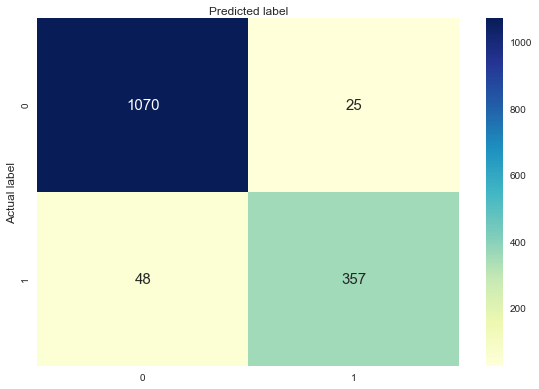

In [43]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
model = LogisticRegression()
features_model = ['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue']
X = df[features_model]

y = np.where(df['Total Profit'] >= 100000, 0, 1)

# split the data
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size =0.3, random_state= 42)
#X_train
#X_val
#y_train
#y_val
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

conmat = confusion_matrix(y_val,y_pred)
val = np.mat(conmat)
classnames = list(set(y_train))

cm = pd.DataFrame(val,index = classnames, columns = classnames)
print(cm)

accuracy = accuracy_score(y_val,y_pred)
print(accuracy)
# create heatmap
fig, ax = plt.subplots()
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.rcParams.update({'font.size': 15})

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import neighbors
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
Y_pred = dtc.predict(X_val)
dtc_score = dtc.score(X_val, y_val)
print(f"Accuracy: {round(accuracy_score(y_val, Y_pred) * 100, 2)}%")
print(f"Precision: {round(precision_score(y_val, Y_pred, average='macro') * 100, 2)}%")
print(f"Recall: {round(recall_score(y_val, Y_pred, average='macro') * 100, 2)}%")

Accuracy: 99.47%
Precision: 99.56%
Recall: 99.09%


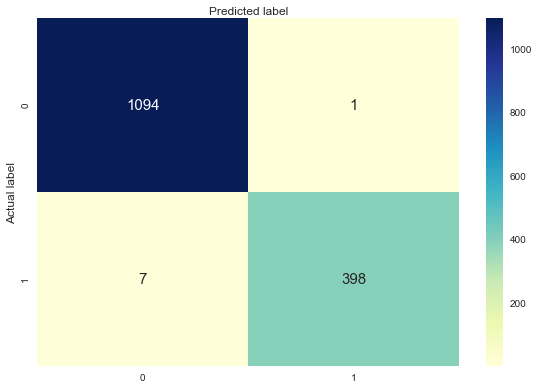

In [45]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_val, Y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.rcParams.update({'font.size': 15})

In [46]:
rfc = RandomForestClassifier(n_estimators = 1000)
rfc.fit(X_train, y_train)
Y_pred = rfc.predict(X_val)
rfc_score = rfc.score(X_val, y_val)
print(f"Accuracy: {round(accuracy_score(y_val, Y_pred) * 100, 2)}%")
print(f"Precision: {round(precision_score(y_val, Y_pred, average='macro') * 100, 2)}%")
print(f"Recall: {round(recall_score(y_val, Y_pred, average='macro') * 100, 2)}%")

Accuracy: 99.6%
Precision: 99.65%
Recall: 99.34%


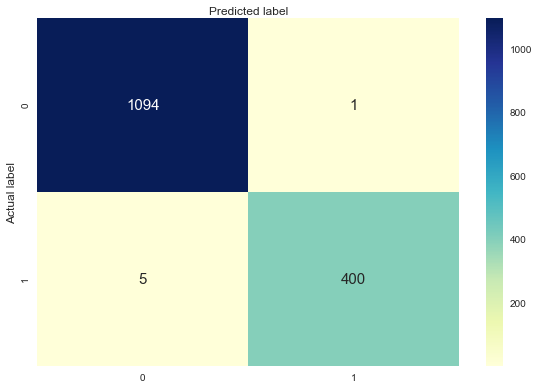

In [47]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_val, Y_pred)
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()

plt.ylabel('Actual label', fontsize=12)
plt.xlabel('Predicted label', fontsize=12)
plt.rcParams.update({'font.size': 15})